## AML Homework 03 – Association Rule Mining

Name: Chaithra Kopparam Cheluvaiah

SUID: 326926205

Email: ckoppara@syr.edu

In [90]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from apyori import apriori

#### 1. DATA LOADING

In [2]:
# loading the data
bank = pd.read_csv(r'bankdata_csv_all.csv')  # file path needs to be changed 

In [3]:
bank.head() # viewing first 5 rows to understand the data

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
bank.shape # total number of rows and cols in the data

(600, 12)

In [5]:
bank.isnull().sum() # no null values

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

<AxesSubplot:>

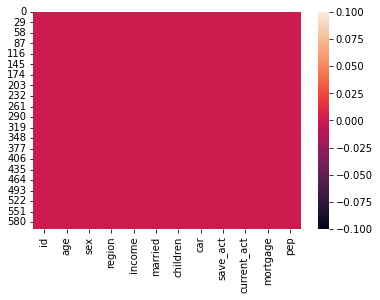

In [6]:
sns.heatmap(bank.isnull())

In [7]:
bank.isna().sum() # no NA values

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

<AxesSubplot:>

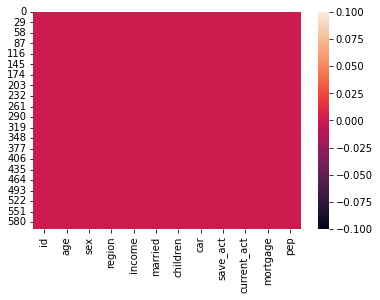

In [8]:
sns.heatmap(bank.isna())

In [9]:
# summary of the statistical data
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,600.0,42.395000,14.424947,18.00,30.0,42.0,55.250,67.0
income,600.0,27524.031217,12899.468246,5014.21,17264.5,24925.3,36172.675,63130.1
children,600.0,1.011667,1.056752,0.00,0.0,1.0,2.000,3.0


#### 2. DATA EXPLORATION

<AxesSubplot:ylabel='car'>

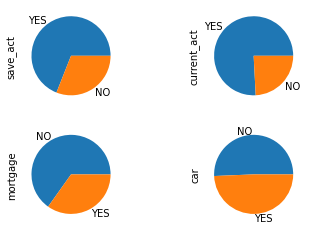

In [10]:
#plot to display type of account counts of customers
plt.subplot(2, 2, 1)
bank.save_act.value_counts().plot(kind='pie')
plt.subplot(2, 2, 2)
bank.current_act.value_counts().plot(kind='pie')
plt.subplot(2, 2, 3)
bank.mortgage.value_counts().plot(kind='pie')
plt.subplot(2, 2, 4)
bank.car.value_counts().plot(kind='pie')
#plt.title('plot to display type of account counts of customers')

<AxesSubplot:title={'center':'plot to show number of applicants and number of children'}, xlabel='Number of Children', ylabel='Number of Applicants'>

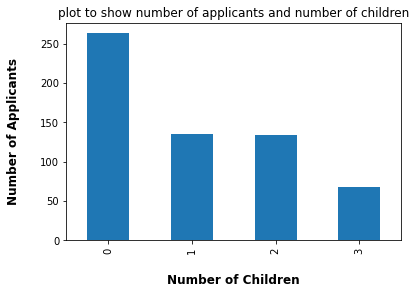

In [11]:
## plot to show number of applicants and number of children
plot = bank.children.value_counts().plot(kind='bar')
plot.set_xlabel("Number of Children", labelpad=20, weight='bold', size=12)
plot.set_ylabel("Number of Applicants", labelpad=20, weight='bold', size=12)
plt.title('plot to show number of applicants and number of children')
plot


Text(0.5, 1.0, 'plot to show married or not count')

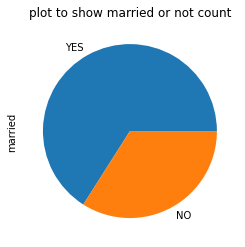

In [12]:
# plot to show married or not count
bank.married.value_counts().plot(kind='pie')
plt.title('plot to show married or not count')


<AxesSubplot:title={'center':'plot to show number of applicants based on their income'}, xlabel='Yearly Income', ylabel='Number of Applicants'>

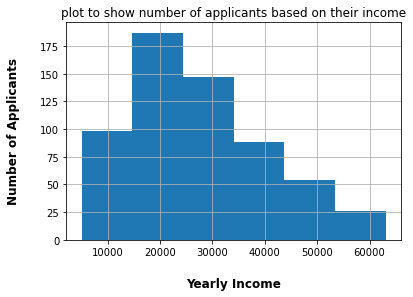

In [13]:
# plot to show number of applicants based on their income
plot = bank.income.hist(bins=6)
plot.set_xlabel("Yearly Income", labelpad=20, weight='bold', size=12)
plot.set_ylabel("Number of Applicants", labelpad=20, weight='bold', size=12)
plt.title('plot to show number of applicants based on their income')

plot

Text(0.5, 1.0, 'plot to show count of gender')

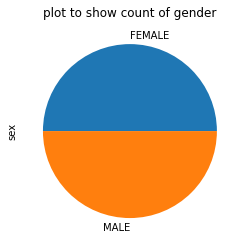

In [14]:
# plot to show count of gender

bank.sex.value_counts().plot(kind='pie')
plt.title('plot to show count of gender')


Text(0.5, 1.0, '# plot to show count of region of cusomters')

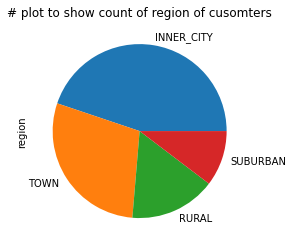

In [15]:
# plot to show count of region of cusomters
bank.region.value_counts().plot(kind='pie')
plt.title('# plot to show count of region of cusomters')


<AxesSubplot:title={'center':' plot to show number of applicants based on their age'}, xlabel='Age (years)', ylabel='Number of Applicants'>

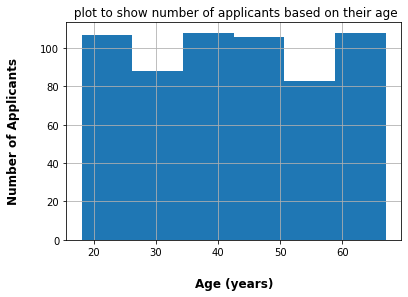

In [16]:
# plot to show number of applicants based on their age

plot = bank.age.hist(bins=6)
plot.set_xlabel("Age (years)", labelpad=20, weight='bold', size=12)
plot.set_ylabel("Number of Applicants", labelpad=20, weight='bold', size=12)
plt.title(' plot to show number of applicants based on their age')

plot

#### 3. DATA PRE-PROCESSING

In [17]:
# drop id column
bank.drop(['id'], axis=1, inplace=True)

# discretization: converting numerical data to categorical 
bank['income'] = pd.qcut(bank['income'], 4, labels=['very_low_income','low_income','medium_income','high_income'])
bank['age'] = pd.qcut(bank['age'], 3, labels=['young','middle_age','old'])

# replacing the values
bank['married'].replace({'NO': 'unmarried', 'YES': 'married'}, inplace=True)
bank['children'].replace({0:'no_children',1:'1_child',2:'2_children',3:'3_children'}, inplace=True)
bank['car'].replace({'NO': 'no_car', 'YES': 'yes_car'}, inplace=True)
bank['save_act'].replace({'NO': 'no_savings_act', 'YES': 'yes_savings_act'}, inplace=True)
bank['current_act'].replace({'NO': 'no_accnt', 'YES': 'yes_accnt'}, inplace=True)
bank['mortgage'].replace({'NO': 'no_mortgage', 'YES': 'yes_mortgage'}, inplace=True)
bank['pep'].replace({'NO': 'no_pep', 'YES': 'yes_pep'}, inplace=True)

In [18]:
bank.head(2)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,middle_age,FEMALE,INNER_CITY,low_income,unmarried,1_child,no_car,no_savings_act,no_accnt,no_mortgage,yes_pep
1,middle_age,MALE,TOWN,medium_income,married,3_children,yes_car,no_savings_act,yes_accnt,yes_mortgage,no_pep


In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          600 non-null    category
 1   sex          600 non-null    object  
 2   region       600 non-null    object  
 3   income       600 non-null    category
 4   married      600 non-null    object  
 5   children     600 non-null    object  
 6   car          600 non-null    object  
 7   save_act     600 non-null    object  
 8   current_act  600 non-null    object  
 9   mortgage     600 non-null    object  
 10  pep          600 non-null    object  
dtypes: category(2), object(9)
memory usage: 43.8+ KB


#### 4. ASSOCIATION RULES

In [41]:
rules = list(apriori(bank.values,
        min_support=0.05,
        min_confidence=0.8,
        min_lift=3,
        max_length=None))
len(rules)

7

In [38]:
for rule in rules[:10]:
    stat = rule.ordered_statistics[0]
    print('Rule: ', list(stat.items_base), ' -> ', list(stat.items_add))
    print("Support: " + str(rule[1]))

    print("Confidence: " + str(stat.confidence))
    print("Lift: " + str(stat.lift))
    print("------------------------------------------------")

Rule:  ['low_income', '1_child']  ->  ['married', 'yes_pep']
Support: 0.05
Confidence: 0.8108108108108109
Lift: 3.1590031590031593
------------------------------------------------
Rule:  ['no_mortgage', 'FEMALE', 'high_income']  ->  ['yes_savings_act', 'old']
Support: 0.06666666666666667
Confidence: 0.8
Lift: 3.0379746835443044
------------------------------------------------
Rule:  ['FEMALE', 'high_income', 'yes_pep']  ->  ['yes_accnt', 'old']
Support: 0.05
Confidence: 0.8108108108108109
Lift: 3.2650099764193725
------------------------------------------------
Rule:  ['FEMALE', 'high_income', 'yes_pep']  ->  ['yes_savings_act', 'old']
Support: 0.05333333333333334
Confidence: 0.8648648648648649
Lift: 3.2842969551830317
------------------------------------------------
Rule:  ['married', 'high_income', 'yes_pep']  ->  ['yes_savings_act', 'old']
Support: 0.06166666666666667
Confidence: 0.8222222222222223
Lift: 3.1223628691983127
------------------------------------------------
Rule:  ['ye

#### 5. ASSOCIATION RULES & PEP

In [88]:
rules = list(apriori(bank.values,
        min_support=0.05,
        min_confidence=0.8,
        min_lift=2,
        max_length=None))
len(rules)

107

In [89]:
for rule in rules:
    stat = rule.ordered_statistics[0]
    if (list(stat.items_add)[0] not in ['yes_pep','no_pep']) or len(stat.items_add) > 1:
        continue
    
    print('Rule: ', list(stat.items_base), ' -> ', list(stat.items_add))
    print("Support: " + str(rule[1]))

    print("Confidence: " + str(stat.confidence))
    print("Lift: " + str(stat.lift))
    print("-------------------------------------")

Rule:  ['low_income', '1_child']  ->  ['yes_pep']
Support: 0.06
Confidence: 0.9729729729729729
Lift: 2.1305977510357073
-------------------------------------
Rule:  ['1_child', 'medium_income']  ->  ['yes_pep']
Support: 0.055
Confidence: 0.9705882352941178
Lift: 2.1253756977243454
-------------------------------------
Rule:  ['1_child', 'middle_age']  ->  ['yes_pep']
Support: 0.07166666666666667
Confidence: 0.9555555555555556
Lift: 2.0924574209245743
-------------------------------------
Rule:  ['1_child', 'old']  ->  ['yes_pep']
Support: 0.06833333333333333
Confidence: 0.9318181818181818
Lift: 2.0404777704047774
-------------------------------------
Rule:  ['2_children', 'high_income']  ->  ['yes_pep']
Support: 0.058333333333333334
Confidence: 0.9210526315789473
Lift: 2.0169035728006146
-------------------------------------
Rule:  ['yes_accnt', '1_child', 'middle_age']  ->  ['yes_pep']
Support: 0.05333333333333334
Confidence: 1.0
Lift: 2.18978102189781
--------------------------------